[1, 0, 0, 1, 0, 0, 1, 1, 1]
[ 5.        +0.00000000e+00j  0.93969262+1.62759536e+00j
 -0.76604444+1.32682790e+00j  2.        +1.11022302e-16j
 -0.17364818-3.00767466e-01j -0.17364818+3.00767466e-01j
  2.        +2.22044605e-16j -0.76604444-1.32682790e+00j
  0.93969262-1.62759536e+00j]
Reconstructed vector: [1 0 0 1 0 0 1 1 1]


<ipython-input-6-e57ce180a1fb>:23: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.round(input_data).astype(int)


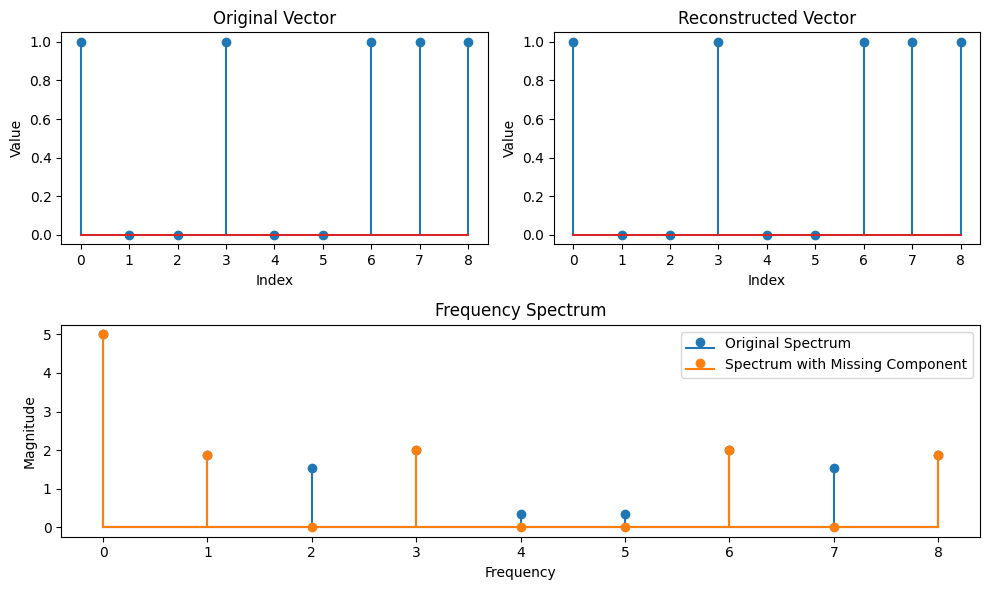

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(input_stream):
    #input_data=np.frombuffer(input_stream, dtype=np.uint16)
    n=len(input_stream)

    coefficients=np.zeros(n, dtype=np.complex_)

    for k in range(n):
        for j in range(n):
            coefficients[k]+=input_stream[j]*np.exp(-2j*np.pi*k*j/n)
    #print("mine=",coefficients)
    return coefficients

def inverse_fourier_transform_mine(coefficients):
    n=len(coefficients)
    input_data=np.zeros(n, dtype=np.complex_)
    for j in range(n):
        for k in range(n):
            input_data[j]+=coefficients[k]*np.exp(2j*np.pi*k*j/n)
    input_data/=n
    return np.round(input_data).astype(int)



def find_smallest_complex(numbers): #this function take the set of complex coeffs and returns the smallest one
    smallest_magnitude = np.inf
    smallest_complex = None
    i = -1
    j = 0
    for complex_num in numbers:
        magnitude = np.abs(complex_num)
        i = i+1
        if magnitude < smallest_magnitude:
            smallest_magnitude = magnitude
            smallest_complex = complex_num
            j = i

    return smallest_complex, j

if __name__ == "__main__":
    v = [1, 0, 0, 1, 0, 0, 1, 1, 1]
    print (v)
    # Perform Fourier transform
    complex_coeffs = fourier_transform(v)
    print(complex_coeffs)
    reconstructed_v = inverse_fourier_transform_mine(complex_coeffs)

    # print("Original vector:", v)
    print("Reconstructed vector:", reconstructed_v)
    # p = complex_coeffs.sort()
    # print(complex_coeffs)
    # print(complex_coeffs[0])
    # print(p)

    smallest_complex, index = find_smallest_complex(complex_coeffs)

    # print("Smallest complex number:", smallest_complex, index)

    # Simulate the loss of one low-frequency component (e.g., set the second element to zero)
    complex_coeffs_missing = complex_coeffs.copy()
    #complex_coeffs_missing[0] = 0
    complex_coeffs_missing[7] = 0
    complex_coeffs_missing[2] = 0
    complex_coeffs_missing[index] = 0
    complex_coeffs_missing[index-1] = 0
    #
    # # Reconstruct the vector using inverse Fourier transform
    # print("i am here")
    # print (complex_coeffs_missing)
    # print (complex_coeffs)
    reconstructed_v = inverse_fourier_transform_mine(complex_coeffs_missing)

    # print("Original vector:", v)
    # print("Reconstructed vector:", reconstructed_v)


    #Plot original vector and reconstructed vector
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 2, 1)
    plt.stem(v)
    plt.title("Original Vector")
    plt.xlabel("Index")
    plt.ylabel("Value")

    plt.subplot(2, 2, 2)
    plt.stem(reconstructed_v.tolist())
    plt.title("Reconstructed Vector")
    plt.xlabel("Index")
    plt.ylabel("Value")

    # Plot frequency spectrum
    plt.subplot(2, 1, 2)
    plt.stem(np.abs(complex_coeffs), markerfmt="C0o", linefmt="C0-", basefmt="C0-")
    plt.stem(np.abs(complex_coeffs_missing), markerfmt="C1o", linefmt="C1-", basefmt="C1-")
    plt.legend(["Original Spectrum", "Spectrum with Missing Component"])
    plt.title("Frequency Spectrum")
    plt.xlabel("Frequency")
    plt.ylabel("Magnitude")

    plt.tight_layout()
    plt.show()